# imports, functions, constants

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, butter, sosfilt, freqz
from scipy import signal
from datetime import datetime


def MakeRawts(times):
    return tot_s(timesL-timesL[0])

def moving_average(x,i,n):
    return np.mean(x[i-n:i])

def nudft(x, t, freqs):
    """
    Non-Uniform Discrete Fourier Transform (NUDFT).
    
    Parameters:
    x : array-like
        Signal values at non-uniform sample times `t`.
    t : array-like
        Non-uniform sample times.
    freqs : array-like
        Frequency values for which the NUDFT is computed.
        
    Returns:
    ndarray
        NUDFT values at specified frequencies.
    """
    t = np.asarray(t)
    x = np.asarray(x)
    freqs = np.asarray(freqs)
    
    # Create the Fourier matrix
    F = np.exp(-2j * np.pi * np.outer(freqs, t))
    
    # Compute the NUDFT
    return np.dot(F, x)

def tot_s(dts):
    return dts.total_seconds()

tot_s=np.vectorize(tot_s)
tots=tot_s

str2date = lambda x: datetime.strptime(x.decode("utf-8"), format_string)

headings = [('time', datetime),('DeviceName', "|S20"),('ChipTime', "|S20"), ('AccX', float), ('AccY', float), ('AccZ', float), ('AsX', float),
             ('AsY', float), ('AsZ', float), ('AngleX', float), ('AngleY', float), ('AngleZ', float), ('HX', float), ('HY', float), ('HZ', float),
           ('Q0', "|S20"),('Q1', "|S20"),('Q2', "|S20"),('Q3', "|S20"),('Temp', float),('Version', "|S20"),('battery', float)
           ]

# Code for importing from .txt

fils=glob.glob("./*.txt")
fils

filnam=fils[1]

format_string = "%Y-%m-%d %H:%M:%S.%f"

devL=b'HC-06(97F0DEC63D0B)'
devR=b'HC-06(AC93933F8377)'

datAll = np.genfromtxt(filnam, delimiter="\t", dtype=headings,skip_header=1, converters = {0: str2date})

keyL=datAll["DeviceName"]==devL
keyR=datAll["DeviceName"]==devR

datL=np.copy(np.sort(datAll[keyL],order='time'))
datR=np.copy(np.sort(datAll[keyR],order='time'))

dtsL=tot_s(np.diff(datL["time"]))

# Code for importing from .csv

In [7]:
fils=glob.glob("./*.csv")
fils

['./311-lab1 - Sheet1 (1).csv',
 './311-lab1 - Sheet1.csv',
 './Data_12042024.csv',
 './Book2.csv',
 './sample_projectile_data.csv']

In [14]:
filnam = "./Data_12042024.csv"

format_string = "%H:%M:%S.%f"

devL=b'COM3'
devR=b'COM5'

datAll = np.genfromtxt(filnam, delimiter=",", dtype=headings,skip_header=1, converters = {0: str2date})

keyL=datAll["DeviceName"]==devL
keyR=datAll["DeviceName"]==devR

datL=np.copy(np.sort(datAll[keyL],order='time'))
datR=np.copy(np.sort(datAll[keyR],order='time'))

dtsL=tot_s(np.diff(datL["time"]))

# potential code to cut beginning window would go below

In [16]:
cutp=int(.056*len(datL))
cutp

599

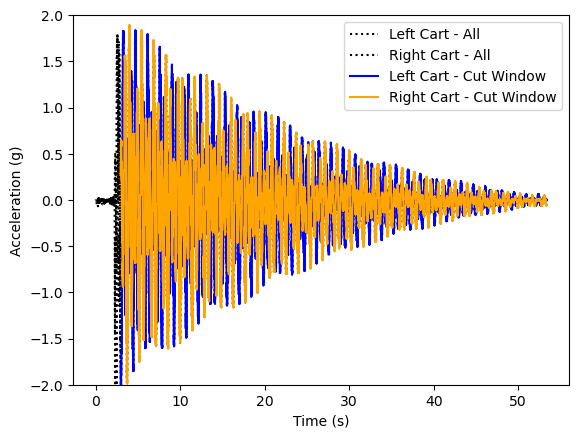

10710


In [18]:
cutb=1
tmin=10.03
tmax=14.85


timesL=datL["time"]
rawtsL=tot_s(timesL-timesL[0])
timesR=datR["time"]
rawtsR=tot_s(timesR-timesR[0])

antimL=np.copy(rawtsL[cutp:-cutb])
andatL=np.copy(datL["AccX"][cutp:-cutb])

antimR=np.copy(rawtsR[cutp:-cutb])
andatR=np.copy(datR["AccX"][cutp:-cutb])

plt.plot(rawtsL,datL["AccX"],label="Left Cart - All",ls="dotted",color="black")
plt.plot(rawtsR,datR["AccX"],label="Right Cart - All",ls="dotted",color="black")

plt.plot(rawtsL[cutp:-cutb],datL["AccX"][cutp:-cutb],label="Left Cart - Cut Window",color="blue")
plt.plot(rawtsR[cutp:-cutb],datR["AccX"][cutp:-cutb],label="Right Cart - Cut Window",color="orange")


plt.ylabel("Acceleration (g)")
plt.xlabel("Time (s)")
plt.legend()
plt.ylim(-2,2)
plt.savefig("Data Cutting.png")
plt.show()


print(len(datL))

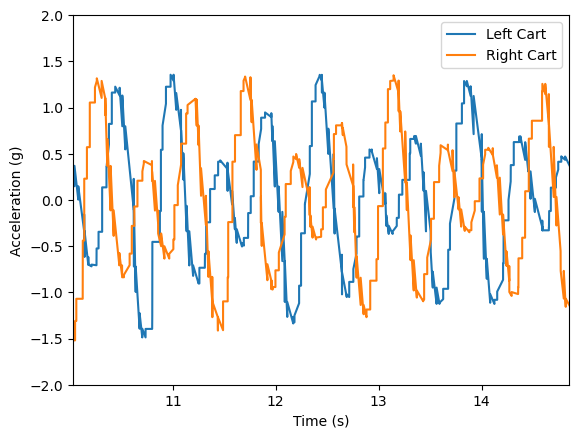

10710


In [19]:
timesL=datL["time"]
rawtsL=tot_s(timesL-timesL[0])
timesR=datR["time"]
rawtsR=tot_s(timesR-timesR[0])

antimL=np.copy(rawtsL[cutp:-cutb])
andatL=np.copy(datL["AccX"][cutp:-cutb])

antimR=np.copy(rawtsR[cutp:-cutb])
andatR=np.copy(datR["AccX"][cutp:-cutb])


plt.plot(rawtsL[cutp:-cutb],datL["AccX"][cutp:-cutb],label="Left Cart")
plt.plot(rawtsR[cutp:-cutb],datR["AccX"][cutp:-cutb],label="Right Cart")

plt.xlim(tmin,tmax)

plt.ylabel("Acceleration (g)")
plt.xlabel("Time (s)")
plt.legend()
plt.ylim(-2,2)
plt.show()

print(len(datL))

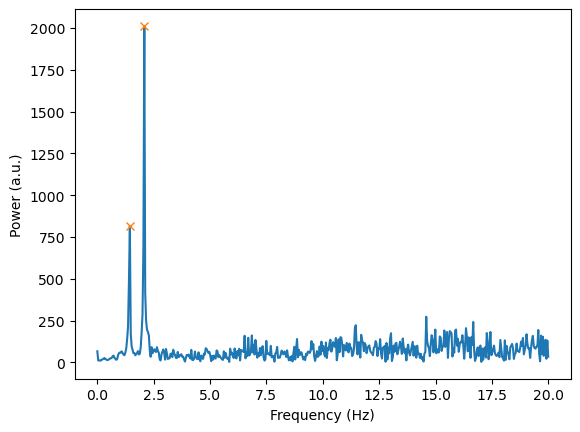

hz: [1.44288577 2.08416834]
bpm: [ 86.57314629 125.0501002 ]


array([ 9.06591868, 13.09521587])

In [22]:
thresh=500 #threshold for peak finding
freqs = np.linspace(0, 20, 500)  # 500 frequency points in Hz

# Compute NUDFT
X = nudft(andatL,antimL, freqs)

x=np.abs(X)

peaks, heights = find_peaks(x, height=thresh)  # Find peaks with height greater than thresh

plt.plot(freqs, x)
plt.plot(freqs[peaks], heights["peak_heights"], "x")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (a.u.)")
plt.show()

print(f"hz: {freqs[peaks]}")
print(f"bpm: {freqs[peaks]*60}")

fp=freqs[peaks]

ws=2*np.pi*freqs[peaks]
ws

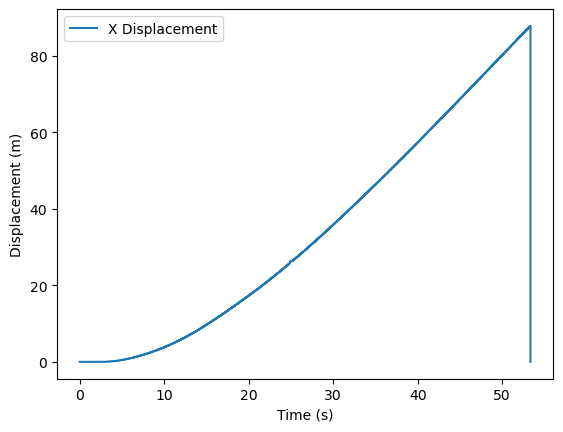

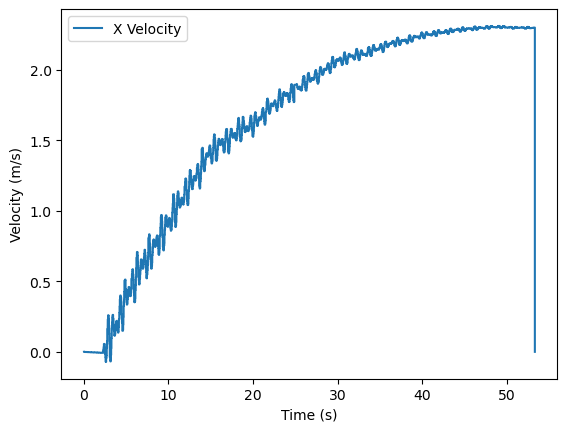

In [24]:
dt=tots(np.diff(datL["time"]))
ax=datL["AccX"][:-1]#(datL["AccX"][:-1]+datL["AccX"][1:])/2
times=datL["time"][:-1]

iters=len(datL)


cut=1

vx_arr=np.zeros((iters))
x_arr=np.zeros((iters))

vx=0
x=0

for i,t in enumerate(times[:-cut]):
    vx+=ax[i]*dt[i]
    x+=vx*dt[i]

    vx_arr[i]=vx
    x_arr[i]=x

        

plt.plot(rawtsL[1:-1],x_arr[1:-1],label="X Displacement")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
# plt.ylabel("Velocity (m/s)")

plt.legend()
plt.show()

plt.plot(rawtsL[1:-1],vx_arr[1:-1],label="X Velocity")

plt.xlabel("Time (s)")
# plt.ylabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")

plt.legend()
plt.show()


might need to adjust a and b for non-uniform data, or make data uniform (interpolate and resample)

Try and fix scales of both modes

could try calculating a_n, b_n by hand

adding as much infor as we can about Pl, PR

# Butter Filter (Still in progress)

f1=fp[0]
df=0.01
b,a=signal.butter(1,[f1-df,f1+df],'band',fs=100)
xhi=signal.filtfilt(b,a,sin1(t))
plt.plot(t,xhi)
plt.plot(t,sin1(t))

# Line of best fit with $e^{-\gamma t}$ drag factor

PoptL[R1,R2,d1,d2]=[-0.00816924 -0.00834854  0.14684567  0.7875358 ]


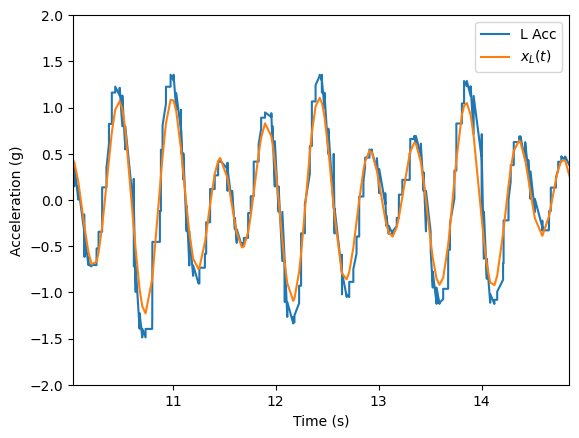

In [26]:
w1=ws[0] #Hz
w2=ws[1] #Hz
g=0.05

import numpy

def xdd1(t,R1,R2,d1,d2):
    output=( numpy.e )**( -1 * g * t ) * ( R1 * ( g + -1 * w1 ) * ( g + w1 ) * numpy.cos( ( d1 + t * w1 ) ) + ( R2 * ( g + -1 * w2 ) * ( g + w2 ) * numpy.cos( ( d2 + t * w2 ) ) + 2 * g * ( R1 * w1 * numpy.sin( ( d1 + t * w1 ) ) + R2 * w2 * numpy.sin( ( d2 + t * w2 ) ) ) ) )
    return output

def xdd2(t,R1,R2,d1,d2):
    output=( numpy.e )**( -1 * g * t ) * ( R1 * ( g + -1 * w1 ) * ( g + w1 ) * numpy.cos( ( d1 + t * w1 ) ) + ( R2 * ( -1 * ( g )**( 2 ) + ( w2 )**( 2 ) ) * numpy.cos( ( d2 + t * w2 ) ) + 2 * g * ( R1 * w1 * numpy.sin( ( d1 + t * w1 ) ) + -1 * R2 * w2 * numpy.sin( ( d2 + t * w2 ) ) ) ) )
    return output
    
R1=1
R2=1 
d1=1 
d2=1  

PL=[R1,R2,d1,d2]
PR=[R1,R2,d1,d2]

poptL,cov=curve_fit(xdd1,antimL,andatL,PL)

poptR,cov=curve_fit(xdd2,antimR,andatR,PR)

plt.plot(antimL,andatL,label="L Acc")
#plt.plot(antimR,andatR,label="R Acc")
plt.plot(antimL,xdd1(antimL,*poptL),label="$x_L(t)$")
#plt.plot(antimR,xdd2(antimR,*poptR),label="$x_R(t)$")

plt.xlim(tmin,tmax)
#plt.xlim(0,50)
plt.ylim(-2,2)

plt.ylabel("Acceleration (g)")
plt.xlabel("Time (s)")
plt.legend()

print("PoptL"f"[R1,R2,d1,d2]={poptL}")
#print("PoptR"f"[R1,R2,d1,d2]={poptR}")
r1,r2,delta1,delta2=poptL

In [ ]:
r1

a view of the fit later, which has some phase lag

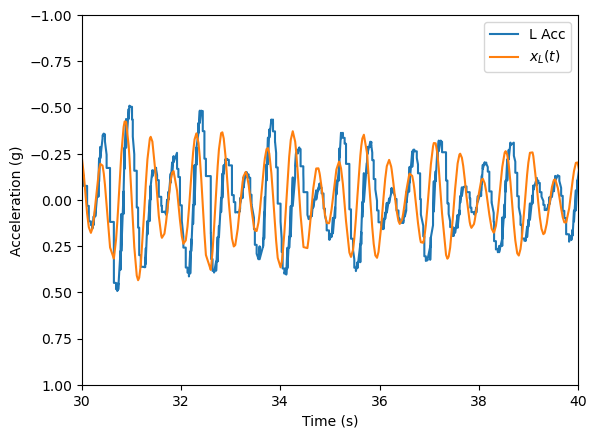

In [28]:
plt.plot(antimL,andatL,label="L Acc")
#plt.plot(antimR,andatR,label="R Acc")
plt.plot(antimL,xdd1(antimL,*poptL),label="$x_L(t)$")
#plt.plot(antimR,xdd2(antimR,*poptR),label="$x_R(t)$")

plt.xlim(30,40)
plt.ylim(1,-1)

plt.ylabel("Acceleration (g)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

# Initial condition calculator r1,r2,d1,d2 -> x01,x02,v01,v02

In [30]:
def initial_condition_calculator(r1, r2, delta1, delta2, omega1, omega2):
    
    a1 = r1*  np.cos(delta1)
    b1 = r1 * np.sin(delta1)
    a2 = r2 * np.cos(delta2)
    b2 = r2 * np.sin(delta2)
    
    x01 = a1 + a2
    x02 = a1 - a2

    v01 = omega1 * b1 + omega2 * b2  
    v02 = omega1 * b1 - omega2 * b2  
    
    return x01, x02, v01, v02

Below is the simulation for quadratic drag. In a perfect world, we would take inputs from the analysis above, then run a simulation below which would match our data. We also could run muyltiple simulations below and then compare (pointwise subtract and create an error term e.g. Chi^2) 

(-0.013971996378413499, -0.0021906456836218334, -0.08830675896175483, 0.06663357146769952)


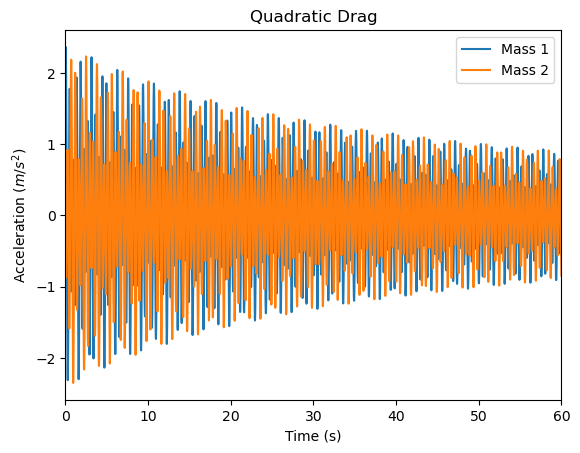

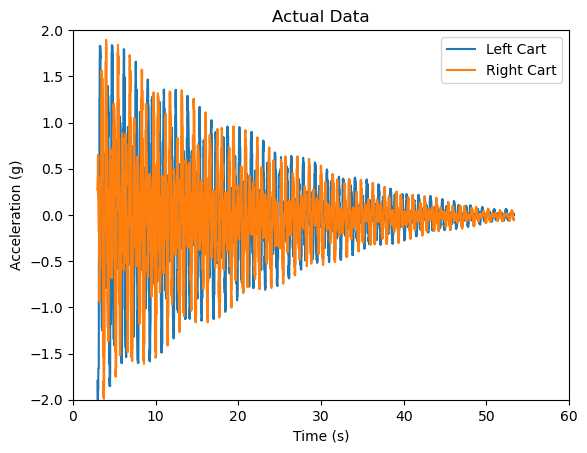

In [39]:
# def fleft(v,x1):
#     force=-k*(x1-x1e)#-m*g-b*v
#     return force

# def fmid(x1,x2):
#     force=-k*(x2-x1-x0)#-m*g-b*v
#     return force

# def fright(v,x2):
#     force=-k*(x2-x2e)#-m*g-b*v
#     return force

def fleft(v,x1):
    force=-k1*(x1)#-m*g-b*v
    return force

def fmid(x1,x2):
    force=-k2*(x2-x1)#-m*g-b*v
    return force

def fright(v,x2):
    force=-k1*(x2)#-m*g-b*v
    return force

def flin(v,b):
    return -b*v

def fquad(v,c):
    return -c*v*np.abs(v)

def sho(t,w0,x0,delta=0):
    return x0*np.cos(w0*t-delta)
   
x1e=1
x2e=2
x0=x2e-x1e

k1=50
k2=25

m1=0.5
m2=0.5
c1=.2
c2=.2

max_t=600 #seconds
timeslice=.001 #seconds

iters=int(np.ceil(max_t/timeslice))

t_arr,dt=np.linspace(0,max_t,iters,retstep=True)
v1_arr=np.zeros((iters))
x1_arr=np.zeros((iters))

v2_arr=np.zeros((iters))
x2_arr=np.zeros((iters))

a1_arr=np.zeros((iters))
a2_arr=np.zeros((iters))

omega1 = w1  # Just assign - no extra conversion needed!
omega2 = w2  # Just assign - no extra conversion needed!



x01, x02, v01, v02 = initial_condition_calculator(r1, r2, delta1, delta2, omega1, omega2)
x1=x01
x2=x02
v1=v01
v2=v02



print(initial_condition_calculator(r1, r2, delta1, delta2, omega1, omega2))

xe=0 #m equilibrirum point for the spring
# a=-k*(x0-xe)
a=0
for i,t in enumerate(t_arr):
    a1 = (fleft(v1, x1) - fmid(x1, x2) + fquad(v1, c1)) / m1
    a2 = (fright(v2, x2) + fmid(x1, x2) + fquad(v2, c2)) / m2

    v1+=a1*dt
    x1+=v1*dt
    
    v2+=a2*dt
    x2+=v2*dt

    v1_arr[i]=v1
    x1_arr[i]=x1
    
    v2_arr[i]=v2
    x2_arr[i]=x2

    a1_arr[i]=a1
    a2_arr[i]=a2

plt.plot(t_arr,a1_arr,label="Mass 1")
plt.plot(t_arr,a2_arr,label="Mass 2")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
plt.xlim(0,60)
plt.legend()
plt.title("Quadratic Drag")
plt.show()

plt.plot(rawtsL[cutp:-cutb],datL["AccX"][cutp:-cutb],label="Left Cart")
plt.plot(rawtsR[cutp:-cutb],datR["AccX"][cutp:-cutb],label="Right Cart")

plt.xlim(0,60)

plt.ylabel("Acceleration (g)")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Actual Data")
plt.ylim(-2,2)
plt.show()